In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data = data.drop('Name', axis = 1)

In [3]:
y = data['Survived']

In [4]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [5]:
data = data.fillna(value = 0)

In [6]:
data = pd.get_dummies(data)

In [7]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,0,0.0,1,2,23.4500,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,1,26.0,0,0,30.0000,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
%%time
tsne = TSNE(random_state = 11)
tsne_representation = tsne.fit_transform(data_scaled)

Wall time: 13.9 s


In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

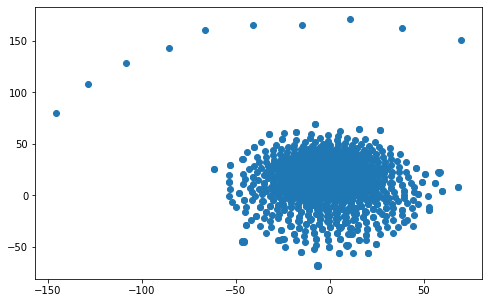

In [11]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

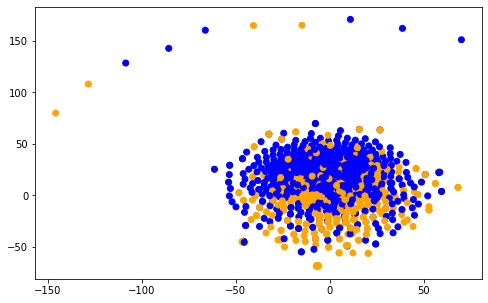

In [12]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c = data['Survived'].map({0: 'blue', 1: 'orange'}));